**Ce projet repose sur une analyse de données pour le recensement des plateformes technologiques de biophysique dont le but est de répondre à la problématique suivante : existe-t-il une corrélation entre le coût de l’équipement et l’influence d’un groupe ?**

**Cette étude a été faite sous la direction de M. Delsuc, directeur de recherche au CNRS, scientifique sénior à l’IGBMC de Strasbourg et cofondateur de Casc4de.**

**Pour répondre à cette problématique, nous nous basons sur le coût de l’équipement : les aimants utilisés en FT-ICR.   
Le FT-ICR (Fourier Transform – Ion Cyclotron Resonance Mass Spectrometry = spectrométrie de masse à résonance cyclotronique ionique) est un instrument produisant un champ magnétique, exprimé en Tesla, permettant de déterminer la composition des molécules.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Projet.csv",sep=',')
df.head(10)

,Auteur,Laboratoire,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017
0,Alan G. Marshall,Florida State University,21.0,121.0,1985.0,55210.0,40844.0,14366.0
1,Gleb N. Vladimirov,Skolkovo institute of science and technology,7.0,10.0,2012.0,455.0,154.0,301.0
2,Evgeny Nikolaev,Skolkovo institute of science and technology,7.0,44.0,1992.0,6646.0,NaN,3232.0
3,Sunghwan Kim,Professor Department of ChemistryKyungpook Nat...,15.0,42.0,2004.0,7449.0,3308.0,4141.0
4,Marcos N. Eberlin,Mackenzie Presbyterian University - School of ...,7.2,83.0,1996.0,30576.0,17877.0,12699.0
5,Peter Oconnor,University of Warwick,12.0,50.0,1995.0,8061.0,5750.0,2311.0
6,Richard D Smith,Pacific Northwest National Laboratory,21.0,163.0,1986.0,111966.0,81471.0,30495.0
7,Wanderson Romao,Instituto Federal do Esperito Santo,9.4,39.0,2010.0,5394.0,1499.0,3895.0
8,Mark R. Viant,University of Birmingham UK,7.0,73.0,1999.0,18223.0,8533.0,9690.0
9,Joseph A. Loo,University of California Los Angeles,15.0,96.0,1990.0,33006.0,23503.0,9503.0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auteur                  38 non-null     object 
 1   Laboratoire             38 non-null     object 
 2   Puissance Tesla         29 non-null     float64
 3   H index                 33 non-null     float64
 4   Actif depuis            33 non-null     float64
 5   Nombre de citations     33 non-null     float64
 6   Citations jusqu a 2016  32 non-null     float64
 7   Citations depuis 2017   33 non-null     float64
dtypes: float64(6), object(2)
memory usage: 2.5+ KB
None


In [4]:
df2 = df.dropna()

df2

,Auteur,Laboratoire,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017
0,Alan G. Marshall,Florida State University,21.0,121.0,1985.0,55210.0,40844.0,14366.0
1,Gleb N. Vladimirov,Skolkovo institute of science and technology,7.0,10.0,2012.0,455.0,154.0,301.0
3,Sunghwan Kim,Professor Department of ChemistryKyungpook Nat...,15.0,42.0,2004.0,7449.0,3308.0,4141.0
4,Marcos N. Eberlin,Mackenzie Presbyterian University - School of ...,7.2,83.0,1996.0,30576.0,17877.0,12699.0
5,Peter Oconnor,University of Warwick,12.0,50.0,1995.0,8061.0,5750.0,2311.0
6,Richard D Smith,Pacific Northwest National Laboratory,21.0,163.0,1986.0,111966.0,81471.0,30495.0
7,Wanderson Romao,Instituto Federal do Esperito Santo,9.4,39.0,2010.0,5394.0,1499.0,3895.0
8,Mark R. Viant,University of Birmingham UK,7.0,73.0,1999.0,18223.0,8533.0,9690.0
9,Joseph A. Loo,University of California Los Angeles,15.0,96.0,1990.0,33006.0,23503.0,9503.0
10,S. Mani Sarathy,King Abdullah University of Science and Techno...,9.4,54.0,2009.0,11664.0,2837.0,8827.0


pente 4.028694617900684 intercept 10.432322331251866
Pearson coefficient: 0.575


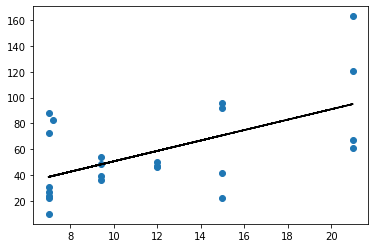

In [5]:
X = df2['Puissance Tesla'].to_numpy()
Y = df2['H index'].to_numpy()
plt.scatter(X,Y)

reg_lin = np.polyfit(X,Y,1)            
print('pente', reg_lin[0], 'intercept', reg_lin[1])
plt.plot(X,np.polyval(reg_lin,X), color='black', linestyle='dashed')

pearson_matrix = np.corrcoef(X,Y)
print("Pearson coefficient:",round(pearson_matrix[0,1],3))

Le coefficient Pearson de 0,58 nous apprend qu'il existe une correlation entre le H index et la puissance Tesla d'un aimant, bien que certains chercheurs ayant des aimants plus modestes surpassent parfois ceux ayant accès à un hardware plus véloce. La pente nous permet d'observer facilement cette corélation haut H-index/forte puissance Tesla.

Ce H index est une façon de percevoir l'influence d'un chercheur. En effet, un H index haut indique un chercheur qui non seulement est souvent cité, mais qui publie beaucoup aussi. On peut donc imaginer que celles et ceux qui ont un **h index haut** et un **nombre de citations élevé** sont les plus influents dans leur domaine.

<AxesSubplot:xlabel='Citations jusqu a 2016', ylabel='H index'>

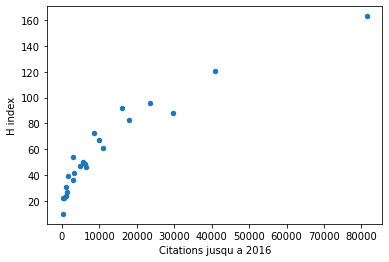

In [6]:
df2.plot.scatter(x='Citations jusqu a 2016',y='H index')

La courbe que forment le H index et le nombre de citations (jusqu'à 2016) est facilement visible ici. Les chercheurs qui ont de nombreuses citations publient souvent et ont un H index haut. Cela démontre leur influence. (Comme Richard D.Smith, bien connu dans le milieu tout en haut à droite du graphique).

<AxesSubplot:xlabel='Citations depuis 2017', ylabel='H index'>

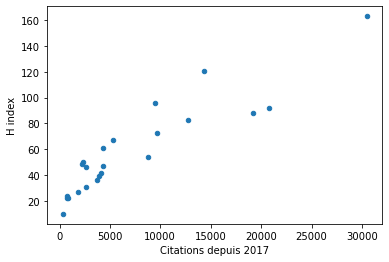

In [7]:
df2.plot.scatter(x='Citations depuis 2017',y='H index')

Depuis 2017, la courbe reste assez similaire. Nous reviendrons dessus plus tard.

In [8]:
df3 = df2.sort_values("Puissance Tesla", ascending = False)
df3

,Auteur,Laboratoire,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017
0,Alan G. Marshall,Florida State University,21.0,121.0,1985.0,55210.0,40844.0,14366.0
6,Richard D Smith,Pacific Northwest National Laboratory,21.0,163.0,1986.0,111966.0,81471.0,30495.0
14,Christopher L. Hendrickson,National High Magnetic Field Laboratory,21.0,61.0,1998.0,15244.0,10953.0,4291.0
37,Ljiljana Pasa Tolic,Pacific Northwest National Laboratory,21.0,67.0,1996.0,15099.0,9792.0,5307.0
33,Peter Christie,Agri-Environment Branch Agri-Food and Bioscien...,15.0,92.0,2002.0,36735.0,15961.0,20774.0
25,Simone Nicolardi,Leiden University Medical Center,15.0,22.0,2008.0,1140.0,341.0,799.0
9,Joseph A. Loo,University of California Los Angeles,15.0,96.0,1990.0,33006.0,23503.0,9503.0
3,Sunghwan Kim,Professor Department of ChemistryKyungpook Nat...,15.0,42.0,2004.0,7449.0,3308.0,4141.0
5,Peter Oconnor,University of Warwick,12.0,50.0,1995.0,8061.0,5750.0,2311.0
12,I Jonathan Amster,University of Georgia,12.0,46.0,1986.0,8973.0,6346.0,2627.0


In [9]:
describe_df = df3['Puissance Tesla'].describe()
describe_df

count    23.000000
mean     11.904348
std       5.156062
min       7.000000
25%       7.000000
50%       9.400000
75%      15.000000
max      21.000000
Name: Puissance Tesla, dtype: float64

In [10]:
Q75 = df3["Puissance Tesla"].quantile(q=0.75)

In [11]:
GrosMoyens = df3.loc[df3['Puissance Tesla']>=Q75,:]
GrosMoyens

,Auteur,Laboratoire,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017
0,Alan G. Marshall,Florida State University,21.0,121.0,1985.0,55210.0,40844.0,14366.0
6,Richard D Smith,Pacific Northwest National Laboratory,21.0,163.0,1986.0,111966.0,81471.0,30495.0
14,Christopher L. Hendrickson,National High Magnetic Field Laboratory,21.0,61.0,1998.0,15244.0,10953.0,4291.0
37,Ljiljana Pasa Tolic,Pacific Northwest National Laboratory,21.0,67.0,1996.0,15099.0,9792.0,5307.0
33,Peter Christie,Agri-Environment Branch Agri-Food and Bioscien...,15.0,92.0,2002.0,36735.0,15961.0,20774.0
25,Simone Nicolardi,Leiden University Medical Center,15.0,22.0,2008.0,1140.0,341.0,799.0
9,Joseph A. Loo,University of California Los Angeles,15.0,96.0,1990.0,33006.0,23503.0,9503.0
3,Sunghwan Kim,Professor Department of ChemistryKyungpook Nat...,15.0,42.0,2004.0,7449.0,3308.0,4141.0


In [12]:
Q25 = df["Puissance Tesla"].quantile(q=0.25)

In [13]:
PeuMoyens = df3.loc[df3['Puissance Tesla']<=Q25,:]
PeuMoyens

,Auteur,Laboratoire,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017
1,Gleb N. Vladimirov,Skolkovo institute of science and technology,7.0,10.0,2012.0,455.0,154.0,301.0
16,Sybil Seitzinger,Pacific Institute for Climate Solutions Univ V...,7.0,88.0,1996.0,48982.0,29798.0,19184.0
22,Lynn R. Mazzoleni,Michigan Technological University,7.0,27.0,2006.0,3184.0,1306.0,1878.0
8,Mark R. Viant,University of Birmingham UK,7.0,73.0,1999.0,18223.0,8533.0,9690.0
28,Frederic Aubriet,Universite de Lorraine,7.0,22.0,2001.0,1420.0,663.0,757.0
30,Rocco Racioppi,Universite della Basilicata,7.0,24.0,1993.0,1881.0,1184.0,697.0
13,Francisco Fernandez Lima,Florida International University,7.0,31.0,2006.0,3543.0,961.0,2582.0


**Combien de fois ont été cités le groupe avec de gros moyens ?**

In [14]:
TotalCitations2016 = GrosMoyens['Citations jusqu a 2016'].sum()
print ("Nombre de citations des groupes avec beaucoup de moyens jusqu'à 2016 inclu:",TotalCitations2016)

Nombre de citations des groupes avec beaucoup de moyens jusqu'à 2016 inclu: 186173.0


In [15]:
TotalCitations2017 = GrosMoyens['Citations depuis 2017'].sum()
print ("Nombre de citations des groupes avec beaucoup de moyens depuis 2017:",TotalCitations2017)

Nombre de citations des groupes avec beaucoup de moyens depuis 2017: 89676.0


**Calcul pour les groupes ayant peu de moyens**

In [16]:
TotalCitations2016p = PeuMoyens['Citations jusqu a 2016'].sum()
print ("Nombre de citations des groupes ayant peu de moyens jusqu'à 2016 inclu:",TotalCitations2016p)

Nombre de citations des groupes ayant peu de moyens jusqu'à 2016 inclu: 42599.0


In [17]:
TotalCitations2017p = PeuMoyens['Citations depuis 2017'].sum()
print ("Nombre de citations des groupes ayant peu de moyens depuis 2017:",TotalCitations2017p)

Nombre de citations des groupes ayant peu de moyens depuis 2017: 35089.0


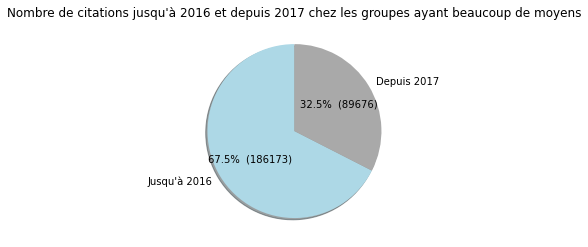

In [18]:
values = [TotalCitations2016, TotalCitations2017] 
labels = ["Jusqu'à 2016", 'Depuis 2017'] 
colors = ['lightblue', 'darkgrey']
plt.title("Nombre de citations jusqu'à 2016 et depuis 2017 chez les groupes ayant beaucoup de moyens")

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:1.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels=labels, colors = colors, autopct=make_autopct(values), shadow=True, startangle=90)
plt.show()

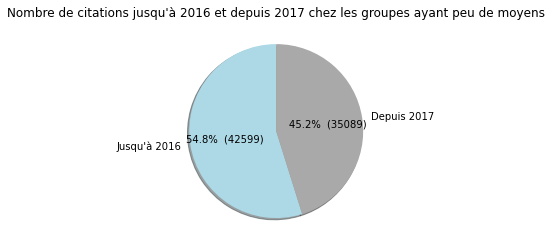

In [19]:
values = [TotalCitations2016p, TotalCitations2017p] 
labels = ["Jusqu'à 2016", 'Depuis 2017'] 
colors = ['lightblue', 'darkgrey']
plt.title("Nombre de citations jusqu'à 2016 et depuis 2017 chez les groupes ayant peu de moyens")

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:1.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels=labels, colors = colors, autopct=make_autopct(values), shadow=True, startangle=90)
plt.show()

**Voir quand a débuté la carrière des chercheurs -> L'intuition c'est que les chercheurs des groupes avec beaucoup de moyens ont débuté plus tôt en moyenne, leur plus longue carrière leur permettant d'accéder aux meilleurs hardwares car ils sont reconnus dans le domaine tandis que les chercheurs des groupes avec moins de moyens sont plus jeunes et ils ont accès à des petits hardwares seulement car ils ont débuté plus récemment.**

In [20]:
MeanGM = GrosMoyens['Actif depuis'].mean()
MeanGM

1996.125

**Les chercheurs avec des gros moyens ont débuté en 1996 en moyenne**

In [21]:
NchercheursGM = TotalCitations2016/len(GrosMoyens)
NchercheursGM

23271.625

**Chacun des chercheurs avec des gros moyens a 23 271 citations en moyenne avant 2017**

In [22]:
NchercheursGM2017 = TotalCitations2017/len(GrosMoyens)
NchercheursGM2017

11209.5

**Chacun des chercheurs avec des gros moyens a été cité 11 209 fois depuis 2017**

**Sur les lignes de code suivantes, on va obtenir la moyenne du nombre de citations par an par chercheur sur les périodes 1991-2016 et depuis 2017**

In [23]:
Periode2016 = NchercheursGM/(2016-MeanGM)
Periode2016

1170.8993710691823

In [24]:
Periode2017 = NchercheursGM2017/(2022-2017)
Periode2017

2241.9

**Chaque chercheur appartenant au groupe des chercheurs avec des gros moyens a en moyenne été cités 1170 fois par an durant la période 1996 - 2016. Ils ont ensuite été cités 2242 fois par an depuis 2017**

**Et maintenant la même chose pour les chercheurs avec moins de moyens**

In [25]:
MeanPM = PeuMoyens['Actif depuis'].mean()
MeanPM

2001.857142857143

In [26]:
NchercheursPM = TotalCitations2016p/len(PeuMoyens)
NchercheursPM

6085.571428571428

In [27]:
NchercheursPM2017 = TotalCitations2017p/len(PeuMoyens)
NchercheursPM2017

5012.714285714285

**Sur les lignes de code suivantes, on va obtenir la moyenne du nombre de citations par chercheur par an sur les périodes 2001-2016 et depuis 2017 pour ceux avec des petits moyens**

In [28]:
Periode2016p = NchercheursPM/(2016-MeanPM)
Periode2016p

430.2929292929303

In [29]:
Periode2017p = NchercheursPM2017/(2022-2017)
Periode2017p

1002.5428571428571

**Les chercheurs avec des petits moyens ont en moyenne été cité 430 fois par an (par chercheur) durant la période 2001 - 2016. Ils ont ensuite été cités 1002 fois par an depuis 2017**

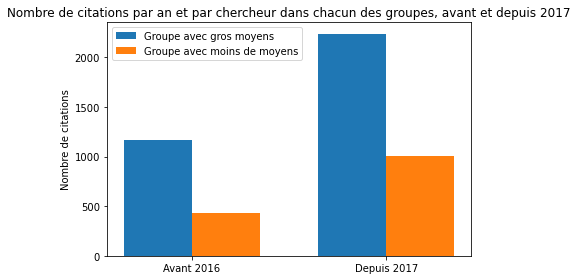

In [30]:
labels = ['Avant 2016', 'Depuis 2017']
Richesmeans = [Periode2016, Periode2017]
Pauvresmeans = [Periode2016p, Periode2017p]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Richesmeans, width, label='Groupe avec gros moyens')
rects2 = ax.bar(x + width/2, Pauvresmeans, width, label='Groupe avec moins de moyens')


ax.set_ylabel('Nombre de citations')
ax.set_title('Nombre de citations par an et par chercheur dans chacun des groupes, avant et depuis 2017')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

**Dans les prochains calculs, nous allons regarder combien de citations chaque groupe obtient avec un Tesla. (Pour les périodes avant 2017 et depuis 2017)**

In [31]:
MeanTeslaGM = GrosMoyens['Puissance Tesla'].mean()
MeanTeslaGM

18.0

Ici nous prenons la Puissance Tesla moyenne du groupe ayant le plus de moyens

In [32]:
CalculSavant2016 = TotalCitations2016 / MeanTeslaGM
CalculSavant2016

10342.944444444445

Et on divise leur nombre total de citations jusqu'à 2016 par la puissance Tesla moyenne

In [33]:
CalculSavant2017 = TotalCitations2017 / MeanTeslaGM
CalculSavant2017

4982.0

Et ici depuis 2017

**Le groupe des chercheurs avec beaucoup de moyens a obtenu en moyenne 10 342 citations par Tesla jusqu'à 2016, puis 4982 citations par Tesla depuis 2017**

In [34]:
MoyenneTesla = CalculSavant2016/len(GrosMoyens)
MoyenneTesla

1292.8680555555557

In [35]:
MoyenneTesla2017 = CalculSavant2017/len(PeuMoyens)
MoyenneTesla2017

711.7142857142857

**Chaque chercheur du groupe ayant des gros moyens a obtenu en moyenne 1292 citations par Tesla jusqu'à 2016 puis 711 depuis 2017.  
Pour mieux reformuler : Chaque Tesla a disposition a permis à un chercheur de ce groupe d'être cité 1292 fois avant 2016 puis 711 fois depuis 2017**

**On fait les mêmes calculs avec le groupe des chercheurs possédant des aimants plus modestes**

In [36]:
MeanTeslaPM = PeuMoyens['Puissance Tesla'].mean()
MeanTeslaPM

7.0

In [37]:
CalculSavant2016p = TotalCitations2016p / MeanTeslaPM
CalculSavant2016p

6085.571428571428

In [38]:
CalculSavant2017p = TotalCitations2017p / MeanTeslaPM
CalculSavant2017p

5012.714285714285

**Le groupe des chercheurs avec moins de moyens a été cité 6085 fois par Tesla jusqu'à 2016, puis a été cité 5012 fois pour chaque Tesla en moyenne depuis 2017**

In [39]:
MoyenneTeslap = CalculSavant2016p/len(PeuMoyens)
MoyenneTeslap

869.3673469387755

In [40]:
MoyenneTesla2017p = CalculSavant2017p/len(PeuMoyens)
MoyenneTesla2017p

716.1020408163265

**Chaque chercheur du groupe ayant peu de moyens a obtenu en moyenne 869 citations par Tesla jusqu'à 2016 puis 716 depuis 2017.  
Pour mieux reformuler : Chaque Tesla a disposition a permis à un chercheur de ce groupe d'être cité 869 fois avant 2016 puis 716 fois depuis 2017**

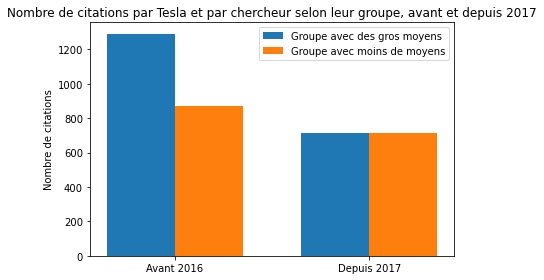

In [41]:
labels = ['Avant 2016', 'Depuis 2017']
Grosmeans = [MoyenneTesla, MoyenneTesla2017]
Petitsmeans = [MoyenneTeslap, MoyenneTesla2017p]

x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Grosmeans, width, label='Groupe avec des gros moyens')
rects2 = ax.bar(x + width/2, Petitsmeans, width, label='Groupe avec moins de moyens')


ax.set_ylabel('Nombre de citations')
ax.set_title('Nombre de citations par Tesla et par chercheur selon leur groupe, avant et depuis 2017')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

**Concernant les Scatter plots déjà observés plus haut, nous nous sommes demandés s'il y avait également des chercheurs qui étaient en perte d'influence, ou d'autres qui au contraire ont tendance à en gagner. C'est pourquoi nous avons rajouté une colonne à notre Data Frame afin de lire plus facilement ces scatter plots : observe t-on une augmentation de l'influence parmi les chercheurs qui ont un budget moindre ?**

In [42]:
dfscatter = pd.read_csv("ProjetGroupes.csv",sep=',')
dfscatter.head(10)

,Auteur,Laboratoire,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017,Groupe
0,Alan G. Marshall,Florida State University,21.0,121.0,1985.0,55210.0,40844.0,14366.0,Beaucoup de moyens
1,Gleb N. Vladimirov,Skolkovo institute of science and technology,7.0,10.0,2012.0,455.0,154.0,301.0,Peu de moyens
2,Evgeny Nikolaev,Skolkovo institute of science and technology,7.0,44.0,1992.0,6646.0,NaN,3232.0,Peu de moyens
3,Sunghwan Kim,Professor Department of ChemistryKyungpook Nat...,15.0,42.0,2004.0,7449.0,3308.0,4141.0,Beaucoup de moyens
4,Marcos N. Eberlin,Mackenzie Presbyterian University - School of ...,7.2,83.0,1996.0,30576.0,17877.0,12699.0,NaN
5,Peter Oconnor,University of Warwick,12.0,50.0,1995.0,8061.0,5750.0,2311.0,NaN
6,Richard D Smith,Pacific Northwest National Laboratory,21.0,163.0,1986.0,111966.0,81471.0,30495.0,Beaucoup de moyens
7,Wanderson Romao,Instituto Federal do Esperito Santo,9.4,39.0,2010.0,5394.0,1499.0,3895.0,NaN
8,Mark R. Viant,University of Birmingham UK,7.0,73.0,1999.0,18223.0,8533.0,9690.0,Peu de moyens
9,Joseph A. Loo,University of California Los Angeles,15.0,96.0,1990.0,33006.0,23503.0,9503.0,Beaucoup de moyens


In [43]:
dfscatter2 = dfscatter.dropna()

dfscatter2

,Auteur,Laboratoire,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017,Groupe
0,Alan G. Marshall,Florida State University,21.0,121.0,1985.0,55210.0,40844.0,14366.0,Beaucoup de moyens
1,Gleb N. Vladimirov,Skolkovo institute of science and technology,7.0,10.0,2012.0,455.0,154.0,301.0,Peu de moyens
3,Sunghwan Kim,Professor Department of ChemistryKyungpook Nat...,15.0,42.0,2004.0,7449.0,3308.0,4141.0,Beaucoup de moyens
6,Richard D Smith,Pacific Northwest National Laboratory,21.0,163.0,1986.0,111966.0,81471.0,30495.0,Beaucoup de moyens
8,Mark R. Viant,University of Birmingham UK,7.0,73.0,1999.0,18223.0,8533.0,9690.0,Peu de moyens
9,Joseph A. Loo,University of California Los Angeles,15.0,96.0,1990.0,33006.0,23503.0,9503.0,Beaucoup de moyens
13,Francisco Fernandez Lima,Florida International University,7.0,31.0,2006.0,3543.0,961.0,2582.0,Peu de moyens
14,Christopher L. Hendrickson,National High Magnetic Field Laboratory,21.0,61.0,1998.0,15244.0,10953.0,4291.0,Beaucoup de moyens
16,Sybil Seitzinger,Pacific Institute for Climate Solutions Univ V...,7.0,88.0,1996.0,48982.0,29798.0,19184.0,Peu de moyens
22,Lynn R. Mazzoleni,Michigan Technological University,7.0,27.0,2006.0,3184.0,1306.0,1878.0,Peu de moyens


C:\Users\joffr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Citations jusqu a 2016', ylabel='H index'>

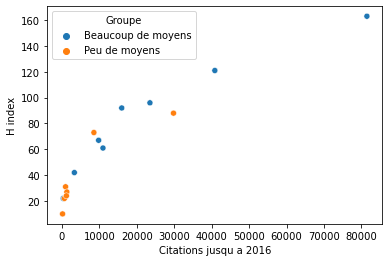

In [44]:
sns.scatterplot('Citations jusqu a 2016', 'H index', hue='Groupe', data=dfscatter2)

C:\Users\joffr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Citations depuis 2017', ylabel='H index'>

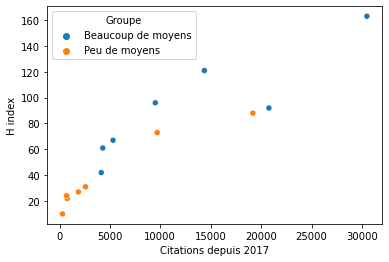

In [45]:
sns.scatterplot('Citations depuis 2017', 'H index', hue='Groupe', data=dfscatter2)

**Au final, on observe très peu de variation entre la période avant 2016 et depuis 2017. La conclusion de notre projet est que le groupe des chercheurs avec des gros moyens sont effectivement plus influents si on regarde de façon brut leur H-index et le nombre de fois où ils ont été cités, mais si l'on fait attention au nombre de citations par Tesla, les chercheurs moins bien dotés font à présent aussi bien, voire mieux que ceux possédant un plus gros budget.**

**Cela est dû au fait que malgré un hardware moins véloce, les scientifiques possédant des plus petites machines font preuve de plus de "créativité" pour obtenir des données intéressantes grâce à un software a beaucoup évolué ces dernières années.**

In [46]:
## La PCA ##

In [47]:
df

,Auteur,Laboratoire,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017
0,Alan G. Marshall,Florida State University,21.0,121.0,1985.0,55210.0,40844.0,14366.0
1,Gleb N. Vladimirov,Skolkovo institute of science and technology,7.0,10.0,2012.0,455.0,154.0,301.0
2,Evgeny Nikolaev,Skolkovo institute of science and technology,7.0,44.0,1992.0,6646.0,NaN,3232.0
3,Sunghwan Kim,Professor Department of ChemistryKyungpook Nat...,15.0,42.0,2004.0,7449.0,3308.0,4141.0
4,Marcos N. Eberlin,Mackenzie Presbyterian University - School of ...,7.2,83.0,1996.0,30576.0,17877.0,12699.0
5,Peter Oconnor,University of Warwick,12.0,50.0,1995.0,8061.0,5750.0,2311.0
6,Richard D Smith,Pacific Northwest National Laboratory,21.0,163.0,1986.0,111966.0,81471.0,30495.0
7,Wanderson Romao,Instituto Federal do Esperito Santo,9.4,39.0,2010.0,5394.0,1499.0,3895.0
8,Mark R. Viant,University of Birmingham UK,7.0,73.0,1999.0,18223.0,8533.0,9690.0
9,Joseph A. Loo,University of California Los Angeles,15.0,96.0,1990.0,33006.0,23503.0,9503.0


In [48]:
dfPCA =df.dropna()
dfPCA.head(10)

,Auteur,Laboratoire,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017
0,Alan G. Marshall,Florida State University,21.0,121.0,1985.0,55210.0,40844.0,14366.0
1,Gleb N. Vladimirov,Skolkovo institute of science and technology,7.0,10.0,2012.0,455.0,154.0,301.0
3,Sunghwan Kim,Professor Department of ChemistryKyungpook Nat...,15.0,42.0,2004.0,7449.0,3308.0,4141.0
4,Marcos N. Eberlin,Mackenzie Presbyterian University - School of ...,7.2,83.0,1996.0,30576.0,17877.0,12699.0
5,Peter Oconnor,University of Warwick,12.0,50.0,1995.0,8061.0,5750.0,2311.0
6,Richard D Smith,Pacific Northwest National Laboratory,21.0,163.0,1986.0,111966.0,81471.0,30495.0
7,Wanderson Romao,Instituto Federal do Esperito Santo,9.4,39.0,2010.0,5394.0,1499.0,3895.0
8,Mark R. Viant,University of Birmingham UK,7.0,73.0,1999.0,18223.0,8533.0,9690.0
9,Joseph A. Loo,University of California Los Angeles,15.0,96.0,1990.0,33006.0,23503.0,9503.0
10,S. Mani Sarathy,King Abdullah University of Science and Techno...,9.4,54.0,2009.0,11664.0,2837.0,8827.0


In [49]:
dfPCA1 = dfPCA.drop(['Auteur','Laboratoire'], axis=1)
dfPCA1

,Puissance Tesla,H index,Actif depuis,Nombre de citations,Citations jusqu a 2016,Citations depuis 2017
0,21.0,121.0,1985.0,55210.0,40844.0,14366.0
1,7.0,10.0,2012.0,455.0,154.0,301.0
3,15.0,42.0,2004.0,7449.0,3308.0,4141.0
4,7.2,83.0,1996.0,30576.0,17877.0,12699.0
5,12.0,50.0,1995.0,8061.0,5750.0,2311.0
6,21.0,163.0,1986.0,111966.0,81471.0,30495.0
7,9.4,39.0,2010.0,5394.0,1499.0,3895.0
8,7.0,73.0,1999.0,18223.0,8533.0,9690.0
9,15.0,96.0,1990.0,33006.0,23503.0,9503.0
10,9.4,54.0,2009.0,11664.0,2837.0,8827.0


In [50]:
from sklearn.preprocessing import StandardScaler
sc_scaled = StandardScaler().fit(dfPCA1)
dfPCA1 = sc_scaled.transform(dfPCA1)

In [51]:
sc_scaled = StandardScaler().fit(dfPCA1.T)
Xcr = sc_scaled.transform(dfPCA1.T)

In [52]:
n=Xcr.shape[0] 
d=Xcr.shape[1]

In [53]:
print(n)
print(d)

6
23


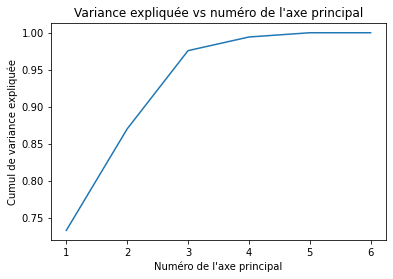

In [54]:
from sklearn.decomposition import PCA  

pca = PCA()
pca.fit(dfPCA1) 

plt.plot(np.arange(1,n+1),np.cumsum(pca.explained_variance_ratio_)) 
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,n+1)) 
plt.title("Variance expliquée vs numéro de l'axe principal")
plt.ylabel("Cumul de variance expliquée")
plt.xlabel("Numéro de l'axe principal")
plt.show()

In [55]:
pca = PCA(n_components = 3)
X_reduced = pca.fit_transform(dfPCA1)